## Observations and Insights

## Dependencies and starter code

In [6]:
# OBSERVATIONS AND INFERENCES
print("THESE MIGHT CHANGE WITH NEW APPROACH 1)  The scatterplot and regression of weight vs. avg. tumor volume across the top 4 drug regimens demonstrate that average tumor volume increases as the weight of the mouse increases.")
print(" 2)  The line plot for a single mouse in the Capomulin regimen shows a steady decrease in the tumor volume as the regimen progressed (45 days).")
print(" 3)  From the statistical output Capomulin and Ramicane appear to be similarly successful in reducing tumor volume.  Not only do they have the lowest values for mean tumor volume but they also have low standard deviations.  They also have similar median average tumor volumes as well as IQR and lower and upper bounds - especially as compared to the other top performing drugs.")  
print(" 4)  Some mice didn't make it through the entire drug regimen (perhaps they died) this affects final tumor volume data as the effects of the drug regimen on these mice can't totally be understood." )

THESE MIGHT CHANGE WITH NEW APPROACH 1)  The scatterplot and regression of weight vs. avg. tumor volume across the top 4 drug regimens demonstrate that average tumor volume increases as the weight of the mouse increases.
 2)  The line plot for a single mouse in the Capomulin regimen shows a steady decrease in the tumor volume as the regimen progressed (45 days).
 3)  From the statistical output Capomulin and Ramicane appear to be similarly successful in reducing tumor volume.  Not only do they have the lowest values for mean tumor volume but they also have low standard deviations.  They also have similar median average tumor volumes as well as IQR and lower and upper bounds - especially as compared to the other top performing drugs.
 4)  Some mice didn't make it through the entire drug regimen (perhaps they died) this affects final tumor volume data as the effects of the drug regimen on these mice can't totally be understood.


In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_merge = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
mouse_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# look at all drug names
drug_regimens = mouse_merge['Drug Regimen'].unique()
drug_regimens

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen
regimen_df = mouse_merge.set_index('Drug Regimen')
regimen_gpd = regimen_df.groupby('Drug Regimen')

drug_stats = regimen_gpd['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'Data Points')

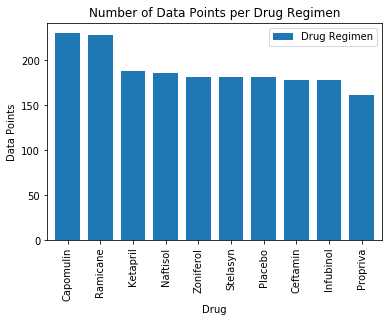

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count_per_drug = mouse_merge['Drug Regimen'].value_counts()
count_df = pd.DataFrame(count_per_drug)
count_df.plot(kind="bar", figsize=(6,4), width =.75)
plt.title("Number of Data Points per Drug Regimen")
plt.xlabel("Drug")
plt.ylabel("Data Points")

Text(0, 0.5, 'Data Points')

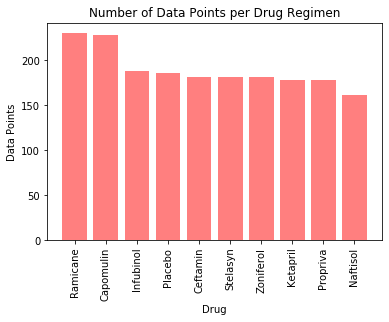

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
index_count = pd.Index(regimen_df.index).value_counts()
index_count
x_axis = np.arange(len(drug_regimens))
plt.bar(x_axis, index_count, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimens,rotation="vertical")
plt.title("Number of Data Points per Drug Regimen")
plt.xlabel("Drug")
plt.ylabel("Data Points")

## Pie plots

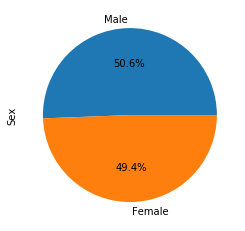

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = mouse_merge[['Drug Regimen','Sex']]
gender_df = gender_df.set_index('Drug Regimen')
gender = gender_df['Sex'].unique()

male_female = (gender_df['Sex'].value_counts(dropna=False))
male_female.plot(y=male_female,kind="pie",autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x1d78d133048>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

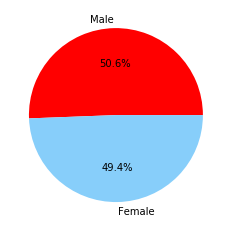

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ["red", "lightskyblue"]
plt.pie(male_female, labels = gender, colors=colors, autopct="%1.1f%%")

## Quartiles, outliers and boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
# find tumor volume at MAX Timepoint
# drop unnecessary drug regimens
trim_df = regimen_df.drop(['Placebo','Stelasyn','Zoniferol','Ketapril','Propriva','Naftisol'])
#print(trim_df)
top_drugs = trim_df.reset_index()
#print(top_drugs)

last_tumor = top_drugs.groupby(['Mouse ID']).agg({
        'Drug Regimen': "first",
        'Timepoint':max,
        'Tumor Volume (mm3)': "last"
            })
last_tumor.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
a203,Infubinol,45,67.973419
a251,Infubinol,45,65.525743
a275,Ceftamin,45,62.999356
a411,Ramicane,45,38.407618
a444,Ramicane,45,43.047543


In [15]:
# group top drugs data
top_drugs_gpd = last_tumor.groupby('Drug Regimen')

In [16]:
# determine quartiles and IQR for final tumor volume for each drug
quartiles = []
lowerq = []
upperq = []
iqr = []
lower_bound = []
upper_bound = []
drugs = []

for drug, group in top_drugs_gpd['Tumor Volume (mm3)']:
    drug = drug
    quarts = group.quantile([.25,.5,.75])
    lq = quarts[0.25]
    uq = quarts[0.75]
    iqr_tum = uq-lq
    lb= lq- (1.5*iqr_tum)
    ub = uq + (1.5*iqr_tum)
    quartiles.append(quarts)
    lowerq.append(lq)
    upperq.append(uq)
    iqr.append(iqr_tum)
    lower_bound.append(lb)
    upper_bound.append(ub)
    drugs.append(drug)
    
quart_stats = {"Drug Regimen":drugs,"Lower Quartile":lowerq, "Upper Quartile":upperq, "IQR":iqr, "Lower Bound":lower_bound,"Upper Bound":upper_bound}
quarts_df = pd.DataFrame(quart_stats)
quarts_df = quarts_df.set_index('Drug Regimen')
quarts_df.head()

,Lower Quartile,Upper Quartile,IQR,Lower Bound,Upper Bound
Drug Regimen,,,,,
Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015
Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458
Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446
Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811


In [17]:
# merge last_tumor with quartile statistics
top_drugs = last_tumor.reset_index()
print(top_drugs)
outliers_df = pd.merge(top_drugs, quarts_df, on = "Drug Regimen")
outliers_df_gpd = outliers_df.groupby('Drug Regimen')
outliers_df

   Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0      a203    Infubinol         45           67.973419
1      a251    Infubinol         45           65.525743
2      a275     Ceftamin         45           62.999356
3      a411     Ramicane         45           38.407618
4      a444     Ramicane         45           43.047543
..      ...          ...        ...                 ...
95     y769     Ceftamin         45           68.594745
96     y793    Capomulin         45           31.896238
97     y865     Ceftamin         45           64.729837
98     z578     Ramicane         45           30.638696
99     z581    Infubinol         45           62.754451

[100 rows x 4 columns]


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Lower Quartile,Upper Quartile,IQR,Lower Bound,Upper Bound
0,a203,Infubinol,45,67.973419,54.048608,65.525743,11.477135,36.832905,82.741446
1,a251,Infubinol,45,65.525743,54.048608,65.525743,11.477135,36.832905,82.741446
2,a577,Infubinol,30,57.031862,54.048608,65.525743,11.477135,36.832905,82.741446
3,a685,Infubinol,45,66.083066,54.048608,65.525743,11.477135,36.832905,82.741446
4,c139,Infubinol,45,72.226731,54.048608,65.525743,11.477135,36.832905,82.741446
...,...,...,...,...,...,...,...,...,...
95,v923,Capomulin,45,40.658124,32.377357,40.159220,7.781863,20.704562,51.832015
96,w150,Capomulin,10,39.952347,32.377357,40.159220,7.781863,20.704562,51.832015
97,w914,Capomulin,45,36.041047,32.377357,40.159220,7.781863,20.704562,51.832015
98,x401,Capomulin,45,28.484033,32.377357,40.159220,7.781863,20.704562,51.832015


In [18]:
# find how many outliers and which one(s)
for drug in outliers_df:
    outliers = outliers_df.loc[(outliers_df["Tumor Volume (mm3)"] < outliers_df['Lower Bound'] ) | (outliers_df["Tumor Volume (mm3)"] > outliers_df['Upper Bound'])]
total_outliers = outliers["Mouse ID"].count()
print(f"There are a total of {total_outliers} outliers.")
outliers

There are a total of 1 outliers.


,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Lower Quartile,Upper Quartile,IQR,Lower Bound,Upper Bound
5,c326,Infubinol,5,36.321346,54.048608,65.525743,11.477135,36.832905,82.741446


In [19]:
# collect Avg. Tumor Value for each Drug Regimen in variables
CapoVol = top_drugs_gpd.get_group('Capomulin')['Tumor Volume (mm3)']
RamiVol = top_drugs_gpd.get_group('Ramicane')['Tumor Volume (mm3)']
InfuVol = top_drugs_gpd.get_group('Infubinol')['Tumor Volume (mm3)']
CeftVol = top_drugs_gpd.get_group('Ceftamin')['Tumor Volume (mm3)']

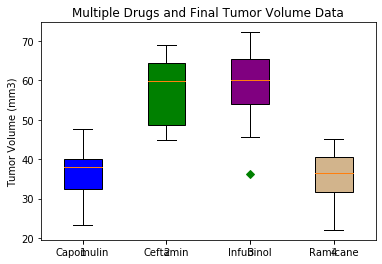

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [CapoVol, CeftVol, InfuVol, RamiVol]
fig2, ax2 = plt.subplots()
ax2.set_title('Multiple Drugs and Final Tumor Volume Data')
plt.ylabel("Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ceftamin', 'Infubinol','Ramicane'])
box = ax2.boxplot(data,0,'gD', patch_artist=True)
 
colors = ['blue', 'green', 'purple', 'tan', 'pink', 'red']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

## Line and scatter plots

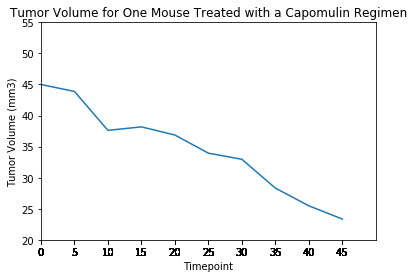

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df = mouse_merge.loc[mouse_merge['Drug Regimen'] == "Capomulin"]

x_axis = Capomulin_df['Timepoint'].iloc[0:10]
y_axis = Capomulin_df['Tumor Volume (mm3)'].iloc[0:10]
plt.plot(x_axis, y_axis)
plt.title("Tumor Volume for One Mouse Treated with a Capomulin Regimen")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(Capomulin_df['Timepoint'])
plt.xlim(0,50)
plt.ylim(20,55)
plt.show()

In [22]:
# find average tumor volume for each mouse in Capomulin regimen
Capomulin_df.set_index('Mouse ID')
Capo_avgs = Capomulin_df.groupby(['Mouse ID']).mean()

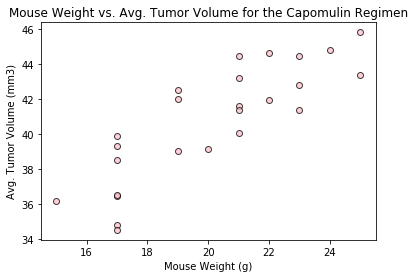

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight = Capo_avgs['Weight (g)']
tum_vol = Capo_avgs['Tumor Volume (mm3)']
plt.scatter(weight, tum_vol, marker="o", facecolors="pink", edgecolors="black", alpha=0.75)
plt.title("Mouse Weight vs. Avg. Tumor Volume for the Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.show()

In [24]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight,tum_vol)
print(f"The correlation between mouse weight and tumor volume for the Capomulin Regimen is {round(correlation[0],2)}")

The correlation between mouse weight and tumor volume for the Capomulin Regimen is 0.84


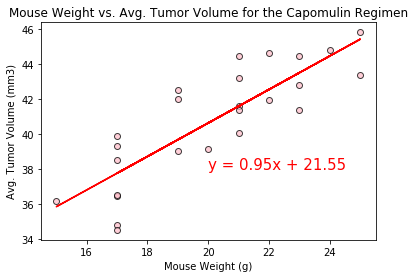

In [25]:
plt.scatter(weight, tum_vol, marker="o", facecolors="pink", edgecolors="black", alpha=0.75)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tum_vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.title("Mouse Weight vs. Avg. Tumor Volume for the Capomulin Regimen")
plt.show()